In [1]:
import sys, os, time
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function
import networkx as nx #Graph
from itertools import groupby #to find groups of integers 
from operator import itemgetter
import matplotlib.pyplot as plt; plt.rcdefaults()
from scipy.stats import skew
from scipy.stats import norm
import statsmodels.api as sm 
import pylab as py 
from itertools import permutations 
from itertools import combinations 
from itertools import combinations_with_replacement  
import statistics
import scipy
from scipy.stats import t
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import ranksums
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import binom
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from numpy.random import randn
from numpy.random import seed
from numpy import cov

def SignTest (data1, data2,p): # p value is symmetric around the mean
    N = len(data1) # total samples
    n_pos = 0
    n_neg = 0
    n_zero = 0
    for i in range(0,N):
        if( data1[i]-data2[i] > 0 ):
            n_pos +=1
        elif (data1[i]-data2[i] < 0):
            n_neg +=1
        else:
            n_zero +=1
    if(abs(n_pos)>abs(n_neg)):
        local = n_pos
        n_pos = n_neg
        n_neg = local
    p_value = binom.cdf(n_pos, N-n_zero, p) + (1- binom.cdf(n_neg-1, N-n_zero, p))
    return p_value

def SignTest_one_population (data1, true_mean):
    N = len(data1) # total samples
    p = 0.5 #is symmetric around the mean
    n_pos = 0
    n_neg = 0
    n_zero = 0
    for i in range(0,N):
        if( data1[i]-true_mean > 0 ):
            n_pos +=1
        elif (data1[i]- true_mean < 0):
            n_neg +=1
        else:
            n_zero +=1
    if(abs(n_pos)>abs(n_neg)):
        local = n_pos
        n_pos = n_neg
        n_neg = local
    p_value = binom.cdf(n_pos, N-n_zero, p) + (1- binom.cdf(n_neg-1, N-n_zero, p))
    return p_value

In [3]:
A = [1.10, 5.09, 0.97, 5.02, 4.67, 5.22, 0.76, 1.17, 1.57, 1.59, 4.60, 2.69, 3.98, 2.62, 1.66, 0.32, 0.55, 1.45, 0.14, 4.47, 1.20, 3.50, 3.17, 3.03, 2.21, 0.69, 4.47, 3.31, 1.17, 2.05]
B = [1,2,3,2]
n = len(A) #--------- Sample Size
print("Sample Size (N):",n)
mn = statistics.mean(A)#--------- Sample Arithmetic mean / average
print("Mean:", "{:.3f}".format(mn))
sd = statistics.stdev(A)#--------- Sample Standard Deviation (SD)
print("SD:","{:.3f}".format(sd))
vr = statistics.variance(A) #--------- Variance
print("Var:","{:.3f}".format(vr))
se = scipy.stats.sem(A)#--------- Standard Error (SE)
print("SE:","{:.3f}".format(se))
median = statistics.median(A) #--------- Median
print("Median:","{:.3f}".format(median))
mode = statistics.mode(B) #--------- Mode (needs integer)
print("Mode:", mode)
skewness = skew(A) #--------- Skewness
print("Skewness:","{:.3f}".format(skewness))

Sample Size (N): 30
Mean: 2.481
SD: 1.616
Var: 2.610
SE: 0.295
Median: 2.130
Mode: 2
Skewness: 0.324


# Check for normality

We will check if this Distribution is Normal, by using a Statistical Tests for Normality. The **Shapiro Wilk** is one of the most powerful tests. By using the function ```stats.shapiro(data)``` we calculate the P-Value. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis. If the P-Value is larger than 0.05, we assume a normal distribution. If the P-Value is smaller than 0.05, we do not assume a normal distribution.

However, if data >5000, the P-Value is less than 0.001. **This does not mean that we reject the null hypothesis and that the ```distribution_array_without_diagonal```data are not normaly distributed, but the data size is too larger in order to reject the null hypothesis.**  

So, in our case we will use **Q-Q Plot** which is a **graphical tool** to help us assess if a set of data plausibly came from a Normal distribution. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. In **Q-Q Plot** If the points (**Ordered Values** , **Theoretical Quantiles**) are behave as a **straight line** then the distribution is **Normal**.

The Shapiro–Wilk test tests the null hypothesis that a sample came from a normally distributed population.
p-value: 0.761
We CAN NOT exclude the null hypotheses --> So the sample is normally distributed


<Figure size 600x600 with 0 Axes>

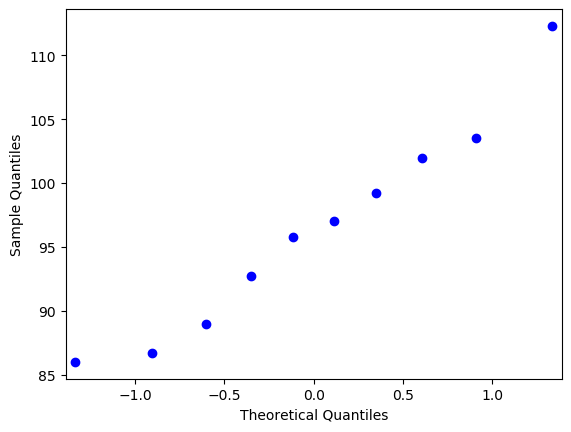

In [65]:
A=[112.3, 97.0, 92.7, 86.0, 102.0, 99.2, 95.8, 103.5, 89.0, 86.7]
a = 0.1

print("The Shapiro–Wilk test tests the null hypothesis that a sample came from a normally distributed population.")
Shapiro_Wilk_test_p_value = scipy.stats.shapiro(A)[1]
print("p-value:","{:.3f}".format(Shapiro_Wilk_test_p_value))

#--------- hypotheses testing 
if( abs(Shapiro_Wilk_test_p_value) <  abs(a) ):
    print("The null hypotheses CAN be rejected --> So the sample is NOT normally distributed")
else:
    print("We CAN NOT exclude the null hypotheses --> So the sample is normally distributed")

plt.figure(4, figsize=(6,6))
fig = sm.qqplot(np.array(A))
py.show() 

# Hypothesis testing

In [3]:
#------------------------------------------ ONE POPULATION ------------------------------------------#
#------------------------- Parametric and Non Parametric Tests
#------- Large Sample (Z-test)
# Given a list of data and one population/true mean. 

#A=[112.3, 97.0, 92.7, 86.0, 102.0, 99.2, 95.8, 103.5, 89.0, 86.7]
A= [112, 97, 92, 86, 104, 99, 95, 103, 89, 86]
true_mean = 105
a_value = 0.1 # Two-tailed test!!! a = Significance level


print("------------------------------ data information -------------------------")
sample_N = len(A) #--------- Sample Size
print("Sample Size (N):",sample_N)
sample_mean = statistics.mean(A)#--------- Sample Arithmetic mean / average
print("Mean:", "{:.3f}".format(sample_mean))
sample_sd = statistics.stdev(A)#--------- Sample Standard Deviation (SD)
print("SD:","{:.3f}".format(sample_sd))


print("------------------- way-1 ------------- Statistic Comparison --------------")
#--------- z Statistic (way-1)
z_statistic = (sample_mean-true_mean)/(sample_sd/math.sqrt(sample_N))
print("Z Statistic:","{:.3f}".format(z_statistic))
#---------  Z Critical Value
z_critical_value_two = scipy.stats.norm.ppf(1-a/2) #<--- Two-tailed test
print("Critical Value:", "{:.3f}".format(z_critical_value_two))
#z_critical_value_left = scipy.stats.norm.ppf(a) #<--- Left-tailed test
#print("Left-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_left))
#z_critical_value_right = scipy.stats.norm.ppf(1-a) #<--- Right-tailed test
#print("Right-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_right))
#--------- hypotheses testing 
if( abs(z_critical_value_two) <  abs(z_statistic) ):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")
  

print("------------------- way-2 -------------- P-value Comparison ---------------")
#--------- z Statistic (way-2)
statistic, p_value = stests.ztest(A,value=true_mean)
print("Z Statistic","{:.3f}".format(statistic))
print("p-value:","{:.3f}".format(p_value))
print("a value:",a_value)
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

------------------------------ data information -------------------------
Sample Size (N): 10
Mean: 96.300
SD: 8.460
------------------- way-1 ------------- Statistic Comparison --------------
Z Statistic: -3.252
Critical Value: 1.645
The null hypotheses CAN be rejected
------------------- way-2 -------------- P-value Comparison ---------------
Z Statistic -3.252
p-value: 0.001
a value: 0.1
The null hypotheses CAN be rejected


In [12]:
#------------------------------------------ ONE POPULATION ------------------------------------------#
#------------------------- Parametric Tests
#------- Small Sample (t-test)
# Given a list of data and one population/true mean. 

#A=[112.3, 97.0, 92.7, 86.0, 102.0, 99.2, 95.8, 103.5, 89.0, 86.7]
A= [112, 97, 92, 86, 104, 99, 95, 103, 89, 86]
true_mean = 105
a_value = 0.001 # Two-tailed test!!! a = Significance level


print("------------------------------ data information -------------------------")
sample_N = len(A) #--------- Sample Size
print("Sample Size (N):",sample_N)
sample_mean = statistics.mean(A)#--------- Sample Arithmetic mean / average
print("Mean:", "{:.3f}".format(sample_mean))
sample_sd = statistics.stdev(A)#--------- Sample Standard Deviation (SD)
print("SD:","{:.3f}".format(sample_sd))

print("------------------- way-1 ------------- Statistic Comparison --------------")
#--------- t Statistic (way-1)
t_statistic = (sample_mean-true_mean)/(sample_sd/math.sqrt(sample_N))
print("t Statistic:","{:.3f}".format(t_statistic))
#--------- t Distribution: Critical Value
df = sample_N-1 # Degrees of freedom
t_critical_value = t.ppf(a/2, df)
print("Critical Value:","{:.3f}".format(t_critical_value))
#--------- hypotheses testing 
if( abs(t_critical_value) <  abs(t_statistic) ):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")
    
print("------------------- way-2 -------------- P-value Comparison ---------------")
#--------- t Statistic (way-2)
statistic, p_value = stats.ttest_1samp(A, true_mean)
print("t Statistic","{:.3f}".format(statistic))
print("p-value:","{:.3f}".format(p_value))
print("a value:",a_value)
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")  

------------------------------ data information -------------------------
Sample Size (N): 10
Mean: 96.300
SD: 8.460
------------------- way-1 ------------- Statistic Comparison --------------
t Statistic: -3.252
Critical Value: -1.833
The null hypotheses CAN be rejected
------------------- way-2 -------------- P-value Comparison ---------------
t Statistic -3.252
p-value: 0.010
a value: 0.001
We CAN NOT exclude the null hypotheses


In [3]:
a_value = 0.01 
sample_mean = 13
true_mean = 10 
sample_sd = 6.4
sample_N = 20 
t_statistic = (sample_mean-true_mean)/(sample_sd/math.sqrt(sample_N))
print("t Statistic:","{:.3f}".format(t_statistic))
#--------- t Distribution: Critical Value
df = sample_N-1 # Degrees of freedom
t_critical_value = t.ppf(a_value/2, df)
print("Critical Value:","{:.3f}".format(t_critical_value))
#--------- hypotheses testing 
if( abs(t_critical_value) <  abs(t_statistic) ):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")




t Statistic: 2.096
Critical Value: -2.861
We CAN NOT exclude the null hypotheses


In [62]:
#------------------------------------------ ONE POPULATION ------------------------------------------#
#------------------------- Non Parametric Tests
#------- Small Sample (Sign/ W. Sign Rank test)
# Given a list of data and one population/true mean. 

d1=[112.3, 97.0, 92.7, 86.0, 102.0, 99.2, 95.8, 103.5, 89.0, 86.7]
true_mean = 100
a = 0.1 # Two-tailed test!!! a = Significance level


statistic, p_value = wilcoxon(d1) #<--- Wilcoxon Signed-Rank Test
print("--Wilcoxon Signed-Rank statistic:","{:.3f}".format(statistic))
print("The two-sided p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   
p_value = SignTest_one_population(d1, true_mean)
print("--Sign Test p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

--Wilcoxon Signed-Rank statistic: 0.000
The two-sided p-value: 0.005
The null hypotheses CAN be rejected
--Sign Test p-value: 0.344
We CAN NOT exclude the null hypotheses


In [132]:
#------------------------------------------ TWO POPULATIONS ------------------------------------------#
#------------------------- Parametric Test Independent
#------- Large Sample (Z-test)
# Given two lists of data 

a_value = 0.01
d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]


print("------------------------------ data information -------------------------")
sample_1_N = len(d1) #--------- Sample Size
print("Sample 1 Size (N):",sample_1_N)
sample_1_mean = statistics.mean(d1)#--------- Sample Arithmetic mean / average
print("Mean 1:", "{:.3f}".format(sample_1_mean))
sample_1_vr = statistics.variance(d1) #--------- Variance
print("Var 1:","{:.3f}".format(sample_1_vr))
sample_2_N = len(d2) #--------- Sample Size
print("Sample 2 Size (N):",sample_2_N)
sample_2_mean = statistics.mean(d2)#--------- Sample Arithmetic mean / average
print("Mean 2:", "{:.3f}".format(sample_2_mean))
sample_2_vr = statistics.variance(d2) #--------- Variance
print("Var 2:","{:.3f}".format(sample_2_vr))

print("------------------- way-1 ------------- Statistic Comparison --------------")
#--------- z Statistic (way-1)
z_indipendent = (sample_1_mean-sample_2_mean)/(math.sqrt((sample_1_vr**2/sample_1_N)+(sample_2_vr**2/sample_2_N)))
print("Independent z Statistic:","{:.3f}".format(z_indipendent))
#---------  Z Critical Value
z_critical_value_two = scipy.stats.norm.ppf(1-a/2) #<--- Two-tailed test
print("Two-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_two))
#z_critical_value_left = scipy.stats.norm.ppf(a) #<--- Left-tailed test
#print("Left-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_left))
#z_critical_value_right = scipy.stats.norm.ppf(1-a) #<--- Right-tailed test
#print("Right-tailed: z Critical Value:", "{:.3f}".format(z_critical_value_right))
#--------- hypotheses testing 
if( abs(z_critical_value_two) <  abs(z_indipendent) ):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")

print("------------------- way-2 -------------- P-value Comparison ---------------")
#--------- z Statistic (way-2)
statistic, p_value = stests.ztest(d1,d2)
print("Independent Z Statistic","{:.3f}".format(statistic))
print("p-value:","{:.3f}".format(p_value))
print("a value:",a_value)
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")  

------------------------------ data information -------------------------
Sample 1 Size (N): 10
Mean 1: 169.500
Var 1: 372.500
Sample 2 Size (N): 10
Mean 2: 182.500
Var 2: 254.278
------------------- way-1 ------------- Statistic Comparison --------------
Independent z Statistic: -0.091
Two-tailed: z Critical Value: 1.645
We CAN NOT exclude the null hypotheses
------------------- way-2 -------------- P-value Comparison ---------------
Independent Z Statistic -1.642
p-value: 0.101
a value: 0.01
We CAN NOT exclude the null hypotheses


In [134]:
#------------------------------------------ TWO POPULATIONS ------------------------------------------#
#------------------------- Parametric Test Independent
#------- Small Sample (t-test-ANOVA)
# Given two lists of data 
from scipy.stats import ttest_ind

a_value = 0.01
#d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
#d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]
d1=[10.6, 9.8, 12.3, 9.7, 8.8]
d2=[10.2, 9.4, 11.8, 9.1, 8.3]

print("------------------------------ data information -------------------------")
sample_1_N = len(d1) #--------- Sample Size
print("Sample 1 Size (N):",sample_1_N)
sample_1_mean = statistics.mean(d1)#--------- Sample Arithmetic mean / average
print("Mean 1:", "{:.3f}".format(sample_1_mean))
sample_1_vr = statistics.variance(d1) #--------- Variance
print("Var 1:","{:.3f}".format(sample_1_vr))
sample_2_N = len(d2) #--------- Sample Size
print("Sample 2 Size (N):",sample_2_N)
sample_2_mean = statistics.mean(d2)#--------- Sample Arithmetic mean / average
print("Mean 2:", "{:.3f}".format(sample_2_mean))
sample_2_vr = statistics.variance(d2) #--------- Variance
print("Var 2:","{:.3f}".format(sample_2_vr))


print("------------------- way-1 ------------- Statistic Comparison --------------")
#---------  t-test Statistic (way-1)
sp_sqrt = ((sample_1_N-1)*sample_1_vr + (sample_2_N-1)*sample_2_vr)/(sample_1_N+sample_2_N-2)
t_indipendent = (sample_1_mean-sample_2_mean)/(math.sqrt(sp_sqrt*(1/sample_1_N + 1/sample_2_N)))
print("Independent t-test:","{:.3f}".format(t_indipendent))
#--------- t Distribution: Critical Value
df = sample_1_N + sample_2_N -2
t_critical_value = t.ppf(a/2, df)
print("t Critical Value:","{:.3f}".format(t_critical_value))
#--------- hypotheses testing 
if( abs(t_critical_value) <  abs(t_indipendent) ):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")
    
    
print("------------------- way-2 -------------- P-value Comparison ---------------")
#---------  t-test Statistic (way-2)
statistic, p_value = ttest_ind(d1,d2)
print("Independent t-test:","{:.3f}".format(statistic))
print("p-value:","{:.3f}".format(p_value))
print("a value:",a_value)
#--------- hypotheses testing (way-1)
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   
    


------------------------------ data information -------------------------
Sample 1 Size (N): 5
Mean 1: 10.240
Var 1: 1.733
Sample 2 Size (N): 5
Mean 2: 9.760
Var 2: 1.763
------------------- way-1 ------------- Statistic Comparison --------------
Independent t-test: 0.574
t Critical Value: -1.860
We CAN NOT exclude the null hypotheses
------------------- way-2 -------------- P-value Comparison ---------------
Independent t-test: 0.574
p-value: 0.582
a value: 0.01
We CAN NOT exclude the null hypotheses


In [139]:
#------------------------------------------ TWO POPULATIONS ------------------------------------------#
#------------------------- Parametric Tests Paired
#------- Small Sample and Large
# Given two lists of data (Paired t-test)

a_value = 0.01
d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]


print("------------------------------ data information -------------------------")
sample_1_N = len(d1) #--------- Sample Size
print("Sample 1 Size (N):",sample_1_N)
sample_1_mean = statistics.mean(d1)#--------- Sample Arithmetic mean / average
print("Mean 1:", "{:.3f}".format(sample_1_mean))
sample_1_vr = statistics.variance(d1) #--------- Variance
print("Var 1:","{:.3f}".format(sample_1_vr))
sample_2_N = len(d2) #--------- Sample Size
print("Sample 2 Size (N):",sample_2_N)
sample_2_mean = statistics.mean(d2)#--------- Sample Arithmetic mean / average
print("Mean 2:", "{:.3f}".format(sample_2_mean))
sample_2_vr = statistics.variance(d2) #--------- Variance
print("Var 2:","{:.3f}".format(sample_2_vr))

print("------------------- way-1 ------------- Statistic Comparison --------------")


print("------------------- way-2 ------------- Statistic Comparison --------------")
#---------  t-test Statistic (way-2)
statistic, p_value = stats.ttest_rel(d1,d2)
print("Paired t-test:","{:.3f}".format(statistic))
print("p-value:","{:.3f}".format(p_value))
print("a value:",a_value)
#--------- hypotheses testing (way-2)
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   
    

------------------------------ data information -------------------------
Sample 1 Size (N): 10
Mean 1: 169.500
Var 1: 372.500
Sample 2 Size (N): 10
Mean 2: 182.500
Var 2: 254.278
------------------- way-1 ------------- Statistic Comparison --------------
------------------- way-2 ------------- Statistic Comparison --------------
Paired t-test: -3.621
p-value: 0.006
a value: 0.01
The null hypotheses CAN be rejected


In [58]:
#------------------------------------------ TWO POPULATIONS ------------------------------------------#
#------------------------- Non Parametric Test Independent
#------- Large Sample (Sum Rank statistic)
# Given two lists of data 

a_value = 0.01
d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]

#--- 
statistic, p_value = ranksums(d1, d2) #<--- Sum Rank  
print("--Sum Rank statistic:","{:.3f}".format(statistic))
print("The two-sided p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

--Sum Rank statistic: -1.512
The two-sided p-value: 0.131
We CAN NOT exclude the null hypotheses


In [59]:
#------------------------------------------ TWO POPULATIONS ------------------------------------------#
#------------------------- Non Parametric Test Independent
#------- Large Sample (Mann-Whitney U)
# Given two lists of data 

a_value = 0.01
d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]

statistic, p_value = mannwhitneyu(d1, d2,alternative=None) 
print("--The Mann-Whitney U statistic:","{:.3f}".format(statistic))
print("The two-sided p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

--The Mann-Whitney U statistic: 30.000
The two-sided p-value: 0.070
We CAN NOT exclude the null hypotheses


In [20]:
#------------------------------------------ TWO POPULATIONS ------------------------------------------#
#------------------------- Non Parametric Test Paired
#------- Large and Small Samples (Sign Test/ W. Sign Rank tests)
# Given two lists of data 

a_value = 0.05
#d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
#d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]
d1 = [3.5, 4, 4.5, 3.5, 2.5, 3, 3, 3.5, 2.5, 3, 4, 4.5, 4, 2.5]
d2 = [2, 3, 4, 4, 2, 2, 4, 3, 1, 2, 2.5, 4, 4, 3]

statistic, p_value = wilcoxon(d1,d2,alternative='two-sided') #<--- Wilcoxon Signed-Rank Test
print("--Wilcoxon Signed-Rank statistic:","{:.3f}".format(statistic))
print("The two-sided p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   
p_value = SignTest(d1, d2,0.5)
print("--Sign Test p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

--Wilcoxon Signed-Rank statistic: 15.500
The two-sided p-value: 0.033
The null hypotheses CAN be rejected
--Sign Test p-value: 0.092
We CAN NOT exclude the null hypotheses


In [6]:
#------------ Wilcoxon Signed-Rank Analyticaly 

d1 = [3.5, 4, 4.5, 3.5, 2.5, 3, 3, 3.5, 2.5, 3, 4, 4.5, 4, 2.5]
d2 = [2, 3, 4, 4, 2, 2, 4, 3, 1, 2, 2.5, 4, 4, 3]

diff = []
for i in range(0,len(d1)):
    diff.append(d1[i]-d2[i])

print(diff)

[1.5, 1, 0.5, -0.5, 0.5, 1, -1, 0.5, 1.5, 1, 1.5, 0.5, 0, -0.5]


In [9]:
data1 = d1
data2 = d2

N = len(data1) # total samples
n_pos = 0
n_neg = 0
n_zero = 0
for i in range(0,N):
    if( data1[i]-data2[i] > 0 ):
        n_pos +=1
    elif (data1[i]-data2[i] < 0):
        n_neg +=1
    else:
        n_zero +=1
if(abs(n_pos)>abs(n_neg)):
    local = n_pos
    n_pos = n_neg
    n_neg = local

print("N:",N," n_pos:",n_pos," n_neg:",n_neg," n_zero:",n_zero)
    
p_value = binom.cdf(n_pos, N-n_zero, 0.5) + (1- binom.cdf(n_neg-1, N-n_zero, 0.5)) # 2-tail
p_value = binom.cdf(n_pos, N-n_zero, 0.5) # 1-tail


print(p_value)

N: 14  n_pos: 3  n_neg: 10  n_zero: 1
0.046142578125000014


In [4]:
#------------------------------------------ THREE+ POPULATIONS ------------------------------------------#
#------------------------- Parametric Independent
#------- Large and Small Samples (One-way ANOVA)
# Given 3 lists of data 


a_value = 0.01
d1 = [7.2, 5.6, 6.1, 4.1, 4.7]
d2 = [6.5, 7.5, 6.2, 8.9, 8.0]
d3 = [10.2, 7.8, 7.7, 6.6, 8.9]

print("------------------- way-2 ------------- Statistic Comparison --------------")
#---------  t-test Statistic (way-2)
F_statistic, p_value = f_oneway(d1, d2, d3)
print("Paired t-test:","{:.3f}".format(F_statistic))
print("p-value:","{:.3f}".format(p_value))
print("a value:",a_value)
#--------- hypotheses testing (way-2)
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   



------------------- way-2 ------------- Statistic Comparison --------------
Paired t-test: 6.327
p-value: 0.013
a value: 0.01
We CAN NOT exclude the null hypotheses


In [157]:
#------------------------------------------ THREE+ POPULATIONS ------------------------------------------#
#------------------------- Parametric Paired
#------- Large and Small Samples (Two/n-way ANOVA)
# Given 3 lists of data 

import numpy as np
import pandas as pd


d1=[6.9, 5.4, 5.8, 4, 4.6]
d2=[6.8, 7.8, 6.5, 9.2, 8.3]
d3=[10.5, 8.1, 8.0, 6.9, 9.2]
#create data
df = pd.DataFrame({'d1': d1,
                   'd2': d2,
                   'd3': d3})

print(df)

import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
#model = ols('d3 ~ C(d2)', data=df).fit()
#sm.stats.anova_lm(model, typ=2)


    d1   d2    d3
0  6.9  6.8  10.5
1  5.4  7.8   8.1
2  5.8  6.5   8.0
3  4.0  9.2   6.9
4  4.6  8.3   9.2


In [ ]:
#------------------------------------------ THREE+ POPULATIONS ------------------------------------------#
#------------------------- Non Parametric Independent
#------- Large and Small Samples (Kruskal-Wallis H test)
# Given 3 lists of data 

a_value = 0.01
d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]
d3 = []



statistic, p_value = kruskal(d1, d2, d3) #<--- Kruskal-Wallis H Test
print("--Kruskal-Wallis H Test","{:.3f}".format(statistic))
print("The two-sided p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

In [ ]:
#------------------------------------------ THREE+ POPULATIONS ------------------------------------------#
#------------------------- Non Parametric Paired
#------- Large and Small Samples (Friedman test)
# Given 3 lists of data 

a_value = 0.01
d1 = [170, 164, 140, 184, 174, 142, 191, 169, 161, 200]
d2 = [201, 179, 159, 195, 177, 170, 183, 179, 170, 212]
d3 = []


statistic, p_value = friedmanchisquare(d1, d2, d3) #<--- Friedman Test
print("--Friedman","{:.3f}".format(statistic))
print("The two-sided p-value:","{:.3f}".format(p_value))
if(abs(p_value) < abs(a_value)):
    print("The null hypotheses CAN be rejected")
else:
    print("We CAN NOT exclude the null hypotheses")   

# Correlation Between Variables

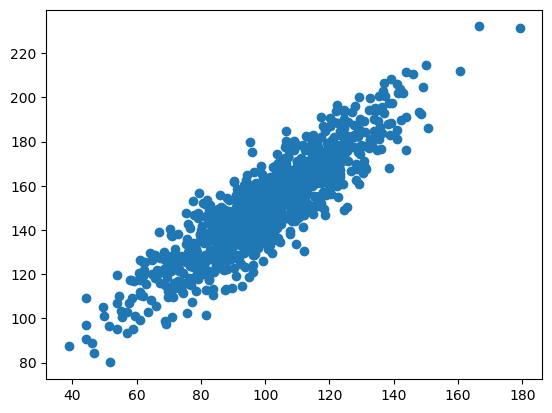

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


TypeError: 'numpy.ndarray' object is not callable

In [161]:


seed(1)
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

pyplot.scatter(data1, data2) # plot
pyplot.show()


# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

#pcc = covariance(d1,d2) / (stdv(d1) * stdv(Y))